# Problem Set 1

## FINM 37301 - 2023

### UChicago Financial Mathematics

* Aman Krishna

In [15]:
import pandas as pd
import numpy as np
import math

In [60]:
# Create a Spot Rate Class to store the spot rates and the base currency and foreign currency
class SpotRate:
    def __init__(self, base, foreign, spot_rates):
        self.base = base
        self.foreign = foreign
        self.spot_rates = spot_rates
    #Create a method to exchange the base currency and foreign currency amounts
    def exchange(self, base_amount, foreign_amount):
        if base_amount == 0:
            print(f'The amount of equivalent {self.base} is {round(foreign_amount / self.spot_rates,4):,}')
        elif foreign_amount == 0:
            print(f'The amount of equivalent {self.foreign} is {round(base_amount * self.spot_rates,4):,}')
        else:
            return "Please enter either the base amount or the foreign amount"

#### 1) If EURJPY is 145.35, how many EUR can JPY 250,000,000 buy?

In [61]:
EURJPY = SpotRate("EUR", "JPY", 145.35)
EURJPY.exchange(0, 250000000)

The amount of equivalent EUR is 1,719,986.2401


#### 2) Assuming the following rates (which include both bid and offer) <br> EURUSD 1.0625 / 27 USDJPY 136.35 / 40

In [62]:
#EURUSD 1.0625 / 27 USDJPY 136.35 / 40
EURUSDbid = SpotRate("EUR", "USD", 1.0625)
EURUSDask = SpotRate("EUR", "USD", 1.0627)
USDJPYbid = SpotRate("USD", "JPY", 136.35)
USDJPYask = SpotRate("USD", "JPY", 136.40)

#### a) If a customer (i.e., market taker) buys USD 25 million versus EUR, what will the EUR amount be?

In [63]:
EURUSDbid.exchange(0,25000000)

The amount of equivalent EUR is 23,529,411.7647


#### b) If a customer buys USD 10 million versus JPY, what will the JPY amount be?

In [64]:
USDJPYask.exchange(10000000,0)

The amount of equivalent JPY is 1,364,000,000.0


#### 3) Derive the following cross rates from their components using the spot rates listed below. Assume all rates are mid-market and ignore bid-offer spread for this exercise
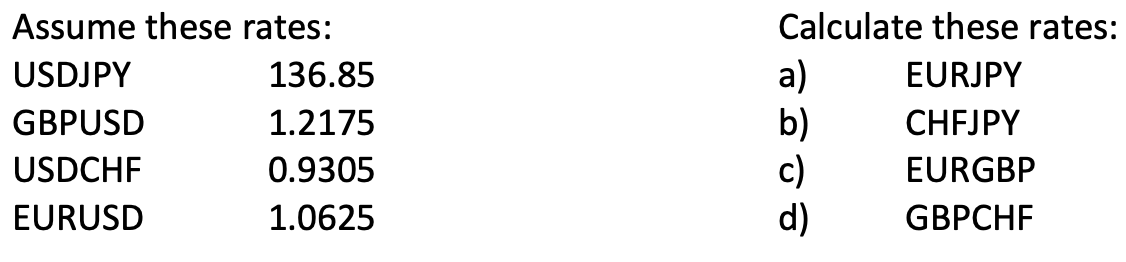

In [65]:
USDJPY = SpotRate("USD", "JPY", 136.85)
GBPUSD = SpotRate("GBP", "USD", 1.2175)
USDCHF = SpotRate("USD", "CHF", 0.9305)
EURUSD = SpotRate("EUR", "USD", 1.0625)

#### a) EURJPY

In [66]:
EURJPY = EURUSD.spot_rates * USDJPY.spot_rates
print(round(EURJPY,4))

145.4031


#### b) CHFJPY

In [67]:
CHFJPY = (1/USDCHF.spot_rates) * USDJPY.spot_rates
print(round(CHFJPY,4))

147.0715


#### c) EURGBP

In [68]:
EURGBP = EURUSD.spot_rates * (1/GBPUSD.spot_rates)
print(round(EURGBP,4))

0.8727


#### d) GBPCHF

In [69]:
GBPCHF = GBPUSD.spot_rates * USDCHF.spot_rates
print(round(GBPCHF,4))

1.1329


#### 4) A trader has the following position, selling CAD 35.70 million versus USD at 1.4120. If the current USDCAD rate is 1.3628, what is the mark-to-market value of the position?

In [76]:
USDCAD = SpotRate("USD", "CAD", 1.3628)
print(f'The USD market equivalent of 35.7 million CAD is $ {round(35700000/USDCAD.spot_rates,4):,}')
print(f"The trader's position is $ {round(35700000/1.4120,4):,}")
print(f'Net M-2-M position is $, {(round(35700000/1.4120 - 35700000/USDCAD.spot_rates,4)):,}')

The USD market equivalent of 35.7 million CAD is $ 26,196,066.921
The trader's position is $ 25,283,286.119
Net M-2-M position is $, -912,780.8021


#### 5) A USD-based trader has the following position: selling EUR 105 million versus CHF at a spot EURCHF rate of 1.1025. The current spot EURCHF rate is 0.9865.

In [77]:
EURCHF_t = SpotRate("EUR", "CHF", 1.1025)
EURCHF_s = SpotRate("EUR", "CHF", 0.9865)

#### a) What do you need to know to calculate the mark-to-market value of the position (in USD)?
#### Ans: The trader needs to know either the EURUSD or CHFUSD spot rate to calculate the mark-to-market value of the position.

#### b) Choose a level for the rate you need to know and show what USD-value the trade would have.

In [92]:
print(f'The trader selling EUR 105 million at 1.1025 is receiving CHF {round(105000000 * EURCHF_t.spot_rates,4):,}')
print(f'The current market value of the position is CHF {round(105000000 * EURCHF_s.spot_rates,4):,}')
print(f'The M-2-M position is CHF {round(-105000000 * EURCHF_s.spot_rates + 105000000 * EURCHF_t.spot_rates,4):,}')
CHF_amount = -105000000 * EURCHF_s.spot_rates + 105000000 * EURCHF_t.spot_rates
print('The USDCHF spot rate is', round(((1/EURUSD.spot_rates)*EURCHF_s.spot_rates),4))
USDCHF = SpotRate("USD", "CHF", ((1/EURUSD.spot_rates)*EURCHF_s.spot_rates))
print(f'The M-2-M position in USD is $, {round(CHF_amount / USDCHF.spot_rates,4):,}')

The trader selling EUR 105 million at 1.1025 is receiving CHF 115,762,500.0
The current market value of the position is CHF 103,582,500.0
The M-2-M position is CHF 12,180,000.0
The USDCHF spot rate is 0.9285
The M-2-M position in USD is $, 13,118,347.6939


#### 6) A EUR-based car manufacturing company sources parts from Mexico.